In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import chi2_contingency
import statsmodels.api as sm

In [10]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [26]:
df_3 = pd.read_csv('https://raw.githubusercontent.com/SazzadSaran/FDS/main/dataset3.csv')
df_3.head()

,ID,Optm,Usef,Relx,Intp,Engs,Dealpr,Thcklr,Goodme,Clsep,Conf,Mkmind,Loved,Intthg,Cheer
0,1087360,5,3,2,1,3,5,4,1,5,2,5,3,5,1
1,1094049,2,3,3,2,3,1,2,1,5,1,2,5,4,2
2,1094067,4,3,4,4,4,4,4,3,4,4,4,4,3,4
3,1097484,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,1102259,5,4,3,5,2,3,4,4,4,4,3,5,5,5


In [22]:
"Missing values before cleaning:"
df_3.isnull().sum()

ID        0
Optm      0
Usef      0
Relx      0
Intp      0
Engs      0
Dealpr    0
Thcklr    0
Goodme    0
Clsep     0
Conf      0
Mkmind    0
Loved     0
Intthg    0
Cheer     0
dtype: int64

In [23]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102580 entries, 0 to 102579
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   ID      102580 non-null  int64
 1   Optm    102580 non-null  int64
 2   Usef    102580 non-null  int64
 3   Relx    102580 non-null  int64
 4   Intp    102580 non-null  int64
 5   Engs    102580 non-null  int64
 6   Dealpr  102580 non-null  int64
 7   Thcklr  102580 non-null  int64
 8   Goodme  102580 non-null  int64
 9   Clsep   102580 non-null  int64
 10  Conf    102580 non-null  int64
 11  Mkmind  102580 non-null  int64
 12  Loved   102580 non-null  int64
 13  Intthg  102580 non-null  int64
 14  Cheer   102580 non-null  int64
dtypes: int64(15)
memory usage: 11.7 MB


In [24]:
df_3.describe()

,ID,Optm,Usef,Relx,Intp,Engs,Dealpr,Thcklr,Goodme,Clsep,Conf,Mkmind,Loved,Intthg,Cheer
count,1.025800e+05,102580.000000,102580.000000,102580.000000,102580.000000,102580.000000,102580.000000,102580.000000,102580.000000,102580.000000,102580.000000,102580.000000,102580.000000,102580.000000,102580.000000
mean,1.059921e+06,3.276087,3.107428,3.097826,3.272314,3.048050,3.369448,3.488039,3.273250,3.557116,3.308491,3.851267,3.897319,3.478748,3.496500
std,3.478290e+04,0.997897,0.953128,1.015441,1.018537,1.076483,1.049365,1.018274,1.126084,1.031297,1.115874,0.974468,1.069985,1.071329,1.012482
min,1.000001e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.029723e+06,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,1.059760e+06,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000
75%,1.090162e+06,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000
max,1.120115e+06,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Show distribution of values in 'Optm' column

In [ ]:
df_3['Optm'].value_counts()

,count
Optm,
3,38306
4,33813
2,15230
5,10050
1,5181


Show distribution of values in 'Loved' column

In [ ]:
df_3['Loved'].value_counts()

,count
Loved,
5,36705
4,32921
3,21675
2,8274
1,3005


Show distribution of values in 'Cheer' column

In [ ]:
df_3['Cheer'].value_counts()

,count
Cheer,
4,37500
3,32710
5,16498
2,12179
1,3693


 Show the distribution of different variables in barplots


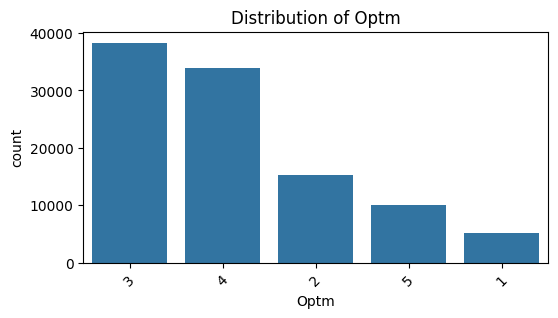

Ratio of the values in Optm:
Optm
3    0.373426
4    0.329626
2    0.148469
5    0.097972
1    0.050507
Name: proportion, dtype: float64




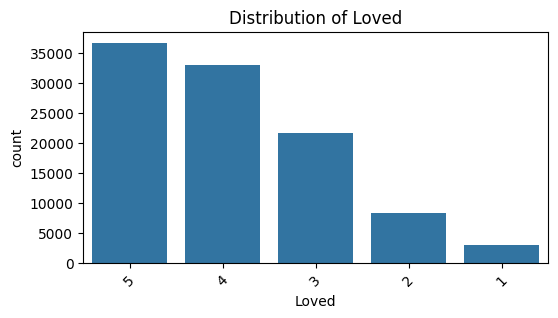

Ratio of the values in Loved:
Loved
5    0.357818
4    0.320930
3    0.211298
2    0.080659
1    0.029294
Name: proportion, dtype: float64




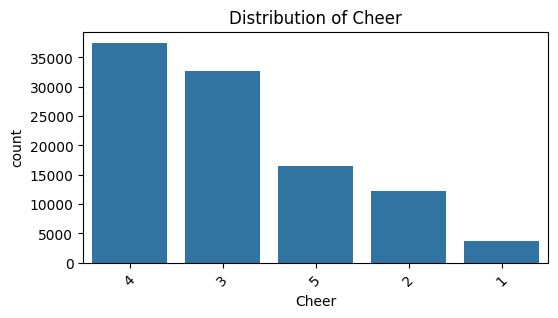

Ratio of the values in Cheer:
Cheer
4    0.365568
3    0.318873
5    0.160831
2    0.118727
1    0.036001
Name: proportion, dtype: float64




In [ ]:
relevant_cols = ['Optm', 'Loved', 'Cheer']

# Loop to plot the distribution and ratio of values
for col in relevant_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(x=col, data=df_3, order=df_3[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

    # Print ratio of the values in the column (normalized counts)
    print(f'Ratio of the values in {col}:')
    print(df_3[col].value_counts(normalize=True))
    print('\n')

Show the percentage values of different categories between two variables

In [ ]:

# Create a crosstab to find the percentage distribution of 'Loved' and 'Cheer' categories

loved_cheer_crosstab = pd.crosstab(df_3['Loved'], df_3['Cheer'], normalize='index') * 100

# Display the crosstab with percentage values
print("Percentage Distribution of 'Loved' and 'Cheer':")
print(loved_cheer_crosstab)


Percentage Distribution of 'Loved' and 'Cheer':
Cheer          1          2          3          4          5
Loved                                                       
1      44.193012  25.357737  19.334443   7.653910   3.460899
2      11.687213  38.324873  34.566111  12.146483   3.275320
3       3.446367  19.907728  48.401384  23.741638   4.502884
4       1.111752   7.858206  34.828833  47.446918   8.754291
5       0.776461   3.661626  19.920992  42.225855  33.415066


Percentage of Loved Respondents by Cheer Levels


<Figure size 1000x600 with 0 Axes>

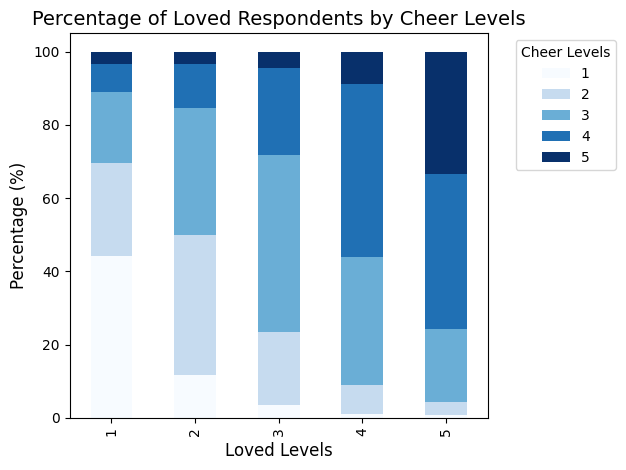

In [ ]:
# Create a crosstab to calculate the percentage of 'Loved' respondents within each level of 'Cheer'
loved_cheer_percentage = pd.crosstab(df_3['Loved'], df_3['Cheer'], normalize='index') * 100


# Plotting the percentage distribution of 'Loved' respondents by 'Cheer' levels
plt.figure(figsize=(10,6))
loved_cheer_percentage.plot(kind='bar', stacked=True, colormap='Blues')

# Adding labels and title
plt.title('Percentage of Loved Respondents by Cheer Levels', fontsize=14)
plt.xlabel('Loved Levels', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(title='Cheer Levels', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

 Inferential Statistical Analysis

In [ ]:
## Chi-Square Test

from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df_3['Loved'], df_3['Cheer'])

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies: \n{expected}")

Chi-Square Statistic: 44746.224942344394
P-value: 0.0
Degrees of Freedom: 16
Expected Frequencies: 
[[  108.18351531   356.77417625   958.21358939  1098.53285241
    483.29586664]
 [  297.87367908   982.34593488  2638.35581985  3024.71241957
   1330.71214662]
 [  780.32535582  2573.40441607  6911.57389355  7923.69370248
   3486.00263209]
 [ 1185.1945116   3908.60654124 10497.62049132 12034.87521934
   5294.7032365 ]
 [ 1321.42293819  4357.86893157 11704.23620589 13418.1858062
   5903.28611815]]


Linear Regression Analysis

Intercept: 1.7618055705516693
Coefficients: [0.10978962 0.31031132]
Mean Squared Error: 0.8515685068859913
R-squared: 0.14992684025861802


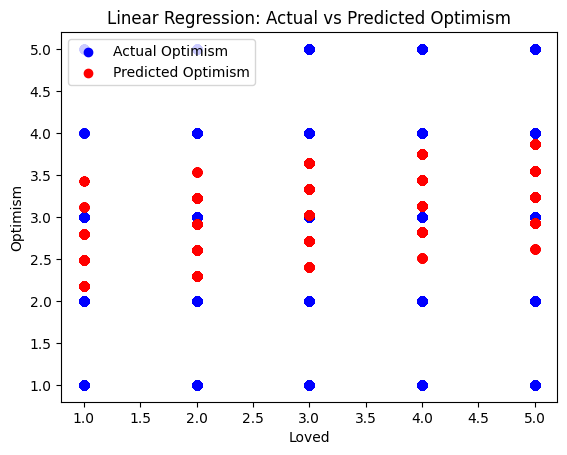

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Defining independent variables (e.g., Loved and Cheer) and dependent variable (Optm)
X = df_3[['Loved', 'Cheer']]  # Independent variables (features)
y = df_3['Optm']              # Dependent variable (target - optimism)

# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
linear_reg = LinearRegression()

# Train the model on the training data
linear_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = linear_reg.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)             # R-squared (coefficient of determination)

# Display the results
print(f"Intercept: {linear_reg.intercept_}")
print(f"Coefficients: {linear_reg.coef_}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualizing the relationship between actual and predicted values (for one variable)
plt.scatter(X_test['Loved'], y_test, color='blue', label='Actual Optimism')
plt.scatter(X_test['Loved'], y_pred, color='red', label='Predicted Optimism')
plt.title('Linear Regression: Actual vs Predicted Optimism')
plt.xlabel('Loved')
plt.ylabel('Optimism')
plt.legend()
plt.show()